<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_6/Module6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly detection

**Аномалія** - це спостереження, яке значно відрізняється від інших спостережень у наборі даних.

Example 1

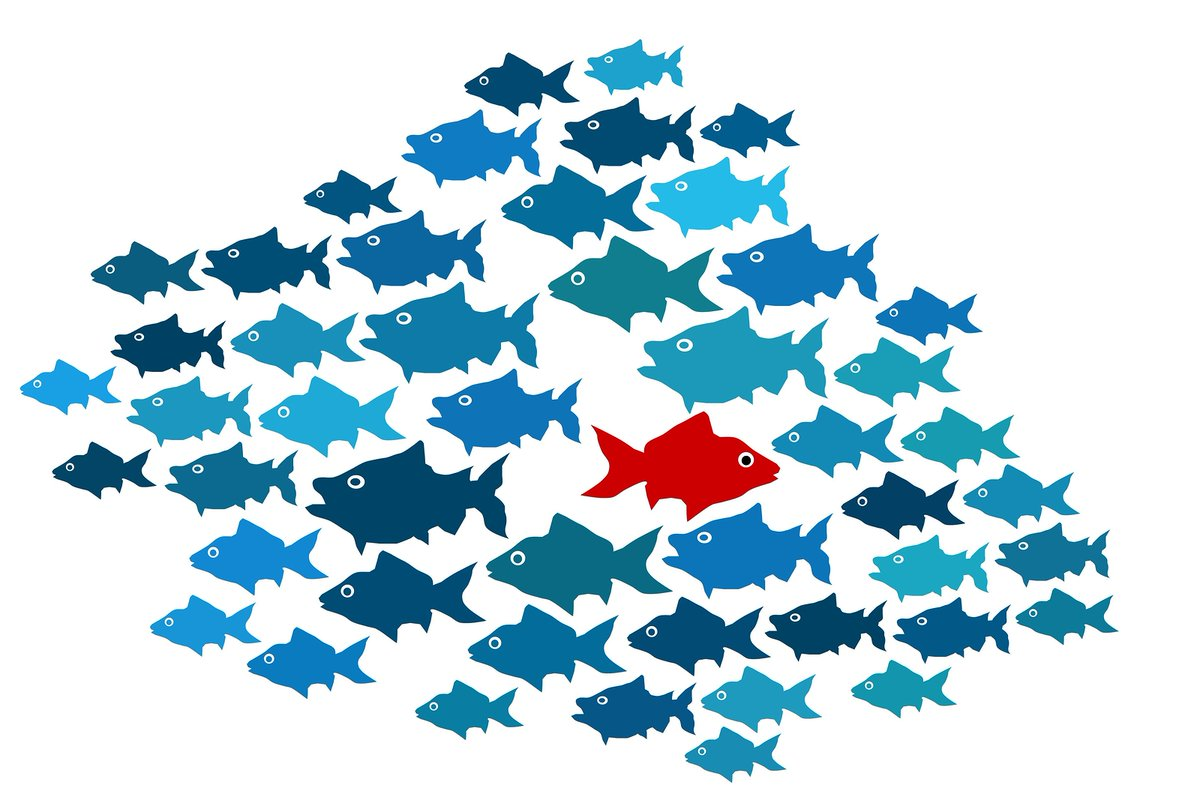

Example 2

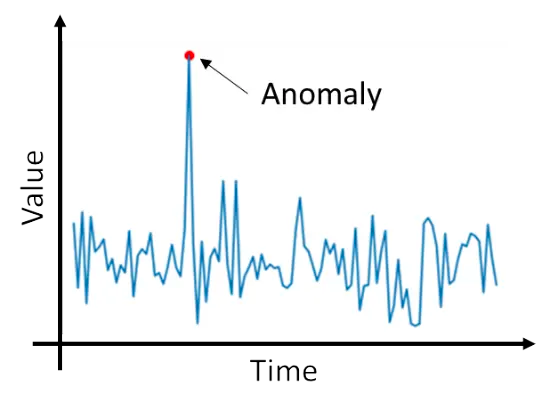

*Це не обов'язково щось погане чи негативне, але точно щось незвичне, що вибивається з очікуваного патерну.*

**Основна мета виявлення аномалій** - ідентифікувати рідкісні, нетипові події, які можуть свідчити про:
- *Помилки*: Некоректні дані, збої в роботі систем, людський фактор.
- *Шахрайство*: Підозрілі фінансові операції, несанкціонований доступ, крадіжка особистих даних.
- *Відхилення від норми*: Нетипова поведінка користувачів, аномальні показники роботи обладнання.

**Застосування виявлення аномалій**:

- *Банківська справа та фінанси*: Виявлення шахрайських транзакцій, відмивання грошей, оцінка ризиків.
- *Кібербезпека*: Ідентифікація вторгнень в мережу, виявлення DDoS-атак, аналіз шкідливого програмного забезпечення.
- *Медицина*: Діагностика захворювань, аналіз медичних знімків, виявлення аномалій в роботі органів.
- *Промисловість*: Контроль якості продукції, прогнозування відмов обладнання, оптимізація виробничих процесів.
- *Маркетинг*: Сегментація клієнтів, виявлення нетипової поведінки покупців.

**Приклади** аномалій в різних сферах:
- *Банківська справа*: Транзакція на 10 000 гривень о 3 годині ночі з нетипової для користувача країни.
- *Медицина*: Температура тіла пацієнта 40°C, коли решта показників в нормі.
- *Виробництво*: Різке зниження продуктивності обладнання, коли всі інші параметри стабільні.

In [1]:
import pandas as pd
import numpy as np

## Credit card fraud dataset

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for **0.172%** of all transactions.

It contains only numerical input variables which are the result of a **PCA** transformation. Unfortunately, due to **confidentiality issues**, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [4]:
df = pd.read_csv("/content/creditcard.csv")

## EDA

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Приклади показників, що можуть використовуватись для детекції аномалій в банківських транзакціях:
- *Сума транзакції:* Незвично великі або малі суми.
- *Час та місце транзакції:* Незвичний час доби, нетипова локація (країна, місто).
- *Частота транзакцій:* Надмірна кількість операцій за короткий проміжок часу.
- *Категорія товару / послуги:* Нетипові покупки для даного користувача.
- *Канал здійснення транзакції:* Незвичний спосіб оплати (онлайн, банкомат, термінал).
- *Дані про пристрій*: Невідомий або підозрілий IP-адреса, операційна система.

In [6]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


### Random Under-Sampling

Зменшимо кількість даних, щоб отримати менш незбалансований набір даних. Це називається "випадковим зменшенням вибірки" (Random Under Sampling).

In [7]:
df = df.sample(frac=1.0, random_state=42)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:len(fraud_df)*10]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1.0, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8842,12093.0,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.00,1
215508,140103.0,-0.310111,1.081641,-0.862850,-1.049064,0.919428,-1.755481,1.619173,-0.394141,0.021091,...,0.205799,0.800223,-0.195103,-0.004306,-0.319271,0.101180,0.493044,0.337608,16.00,0
106916,70189.0,-0.921714,0.993392,1.041664,-0.755426,-0.226694,-0.473482,0.198715,0.614659,-0.214753,...,-0.135255,-0.441214,-0.075923,-0.005649,-0.221487,0.302211,0.164093,0.101812,1.00,0
135390,81230.0,1.446575,-1.021551,-0.392127,-1.674214,-0.600714,-0.045701,-0.639545,-0.039936,-2.358240,...,-0.461350,-1.082110,0.037867,-0.874945,0.325226,-0.388825,0.006118,-0.000565,51.24,0
43754,41640.0,-1.140738,1.268287,0.762564,0.368554,-0.081724,-0.050306,0.465413,0.496892,-0.751222,...,0.179956,0.504056,-0.034154,0.020019,0.246447,-0.355009,-0.058676,-0.006333,47.15,0


In [8]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

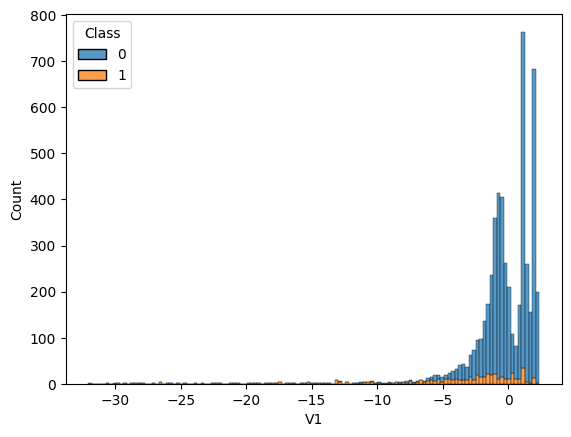

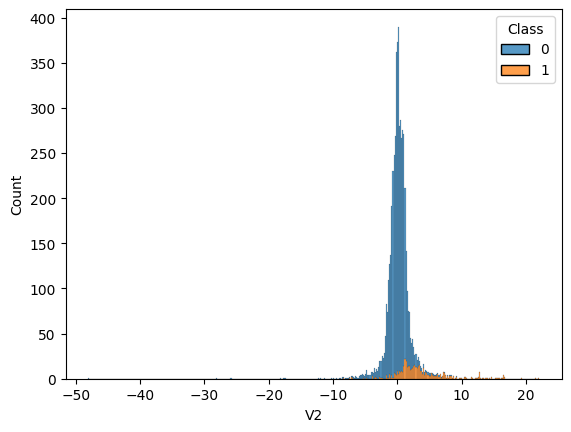

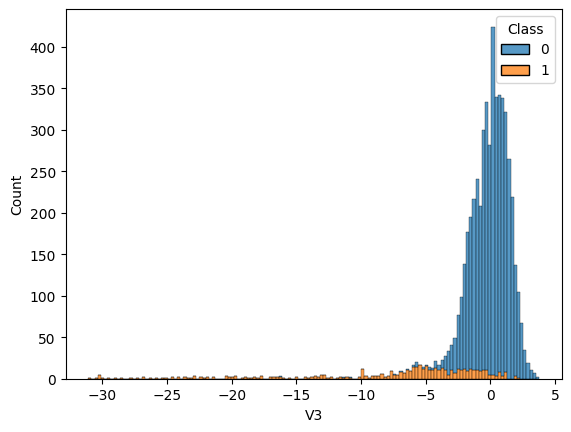

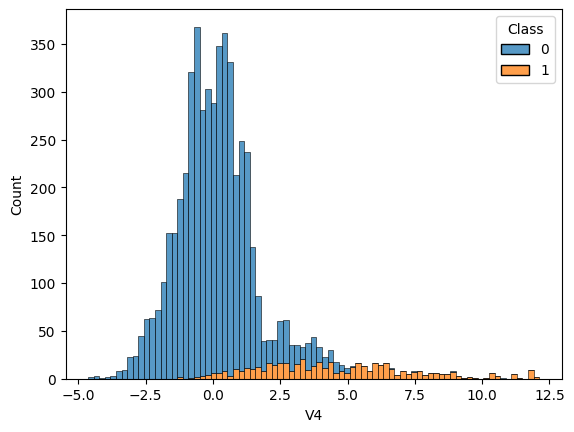

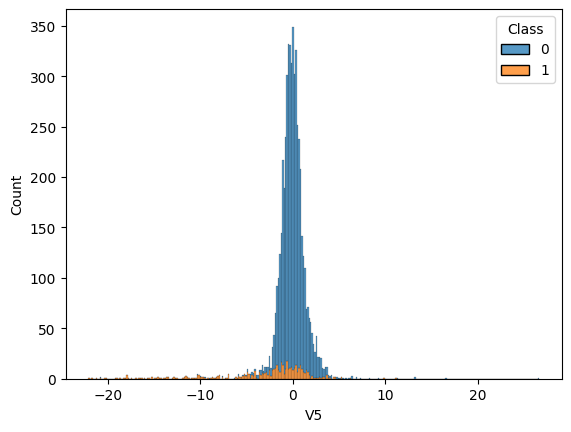

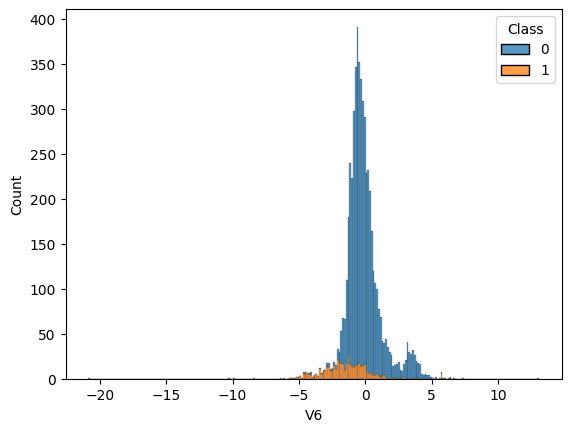

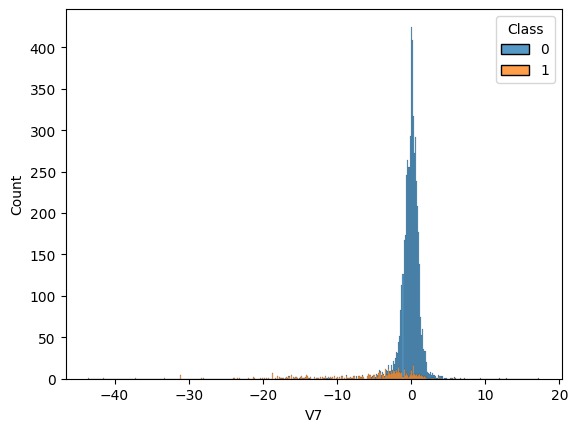

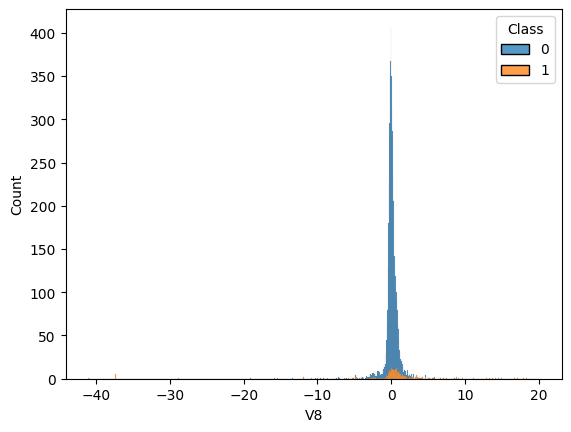

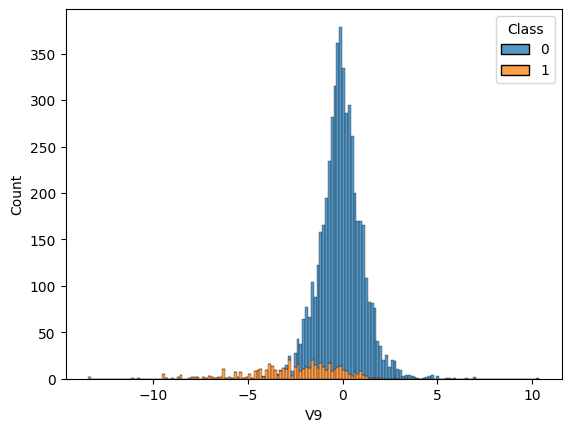

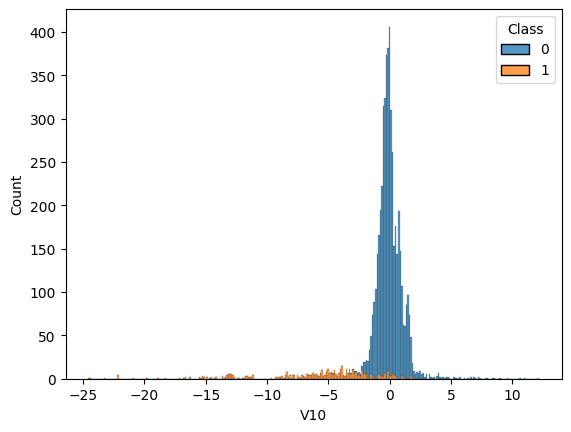

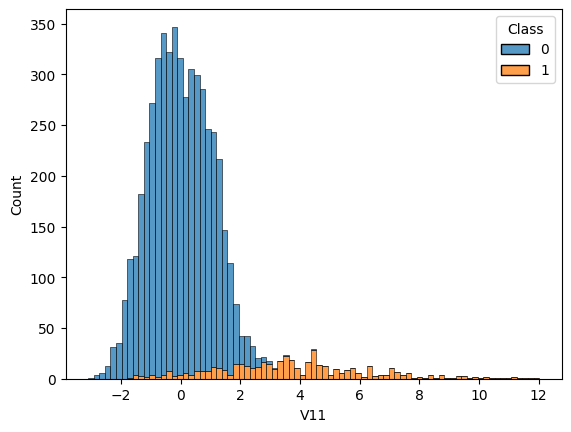

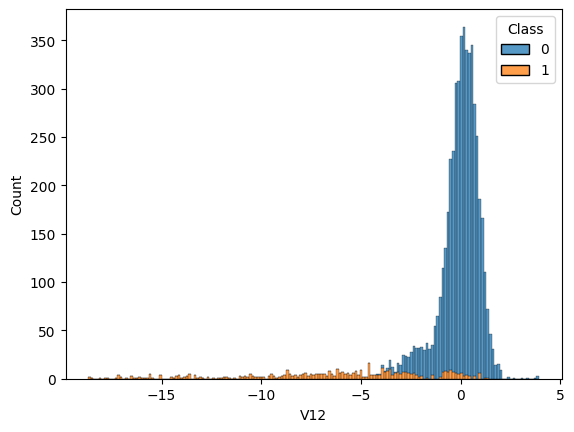

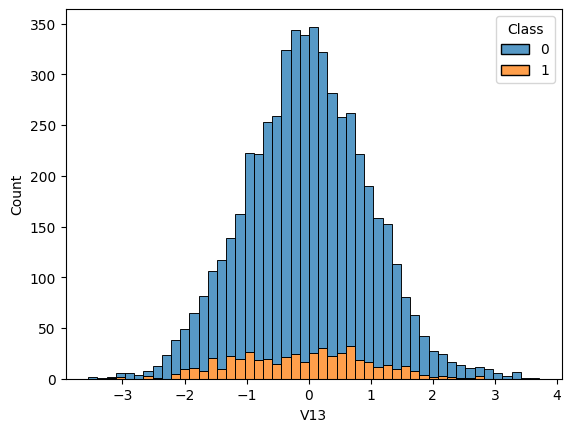

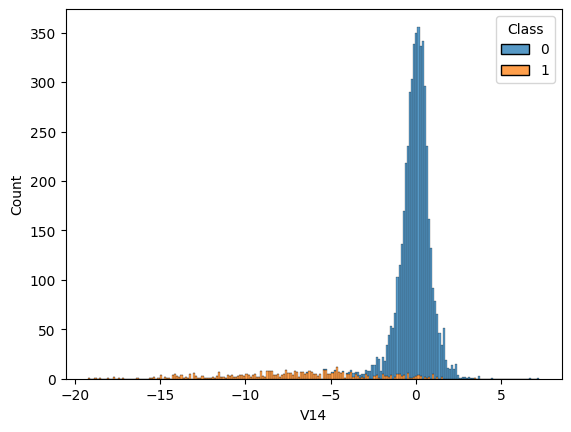

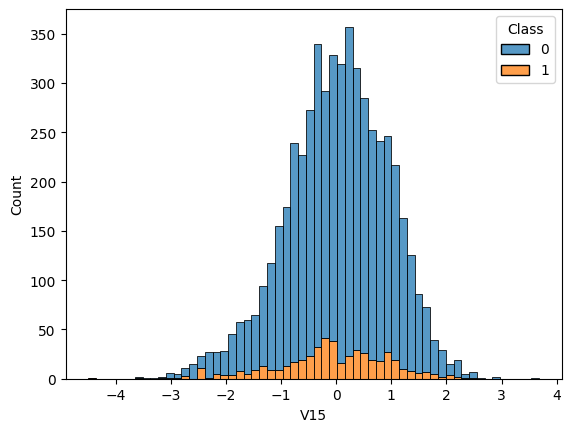

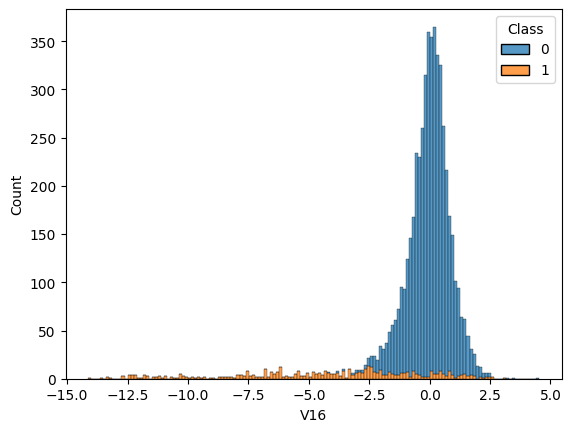

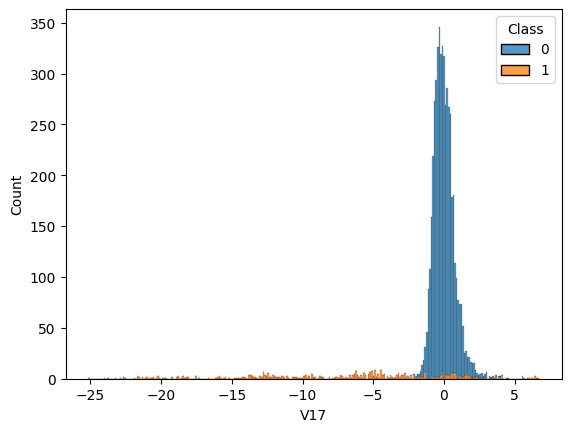

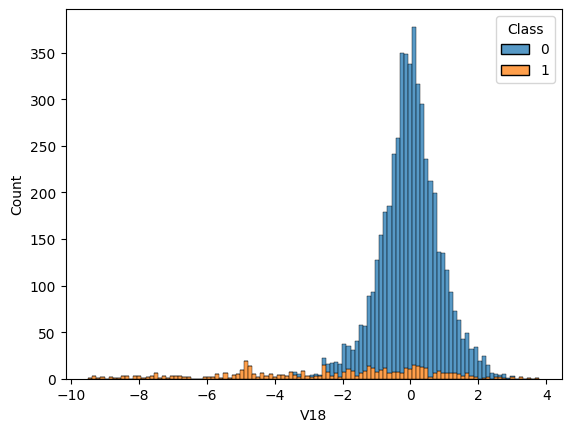

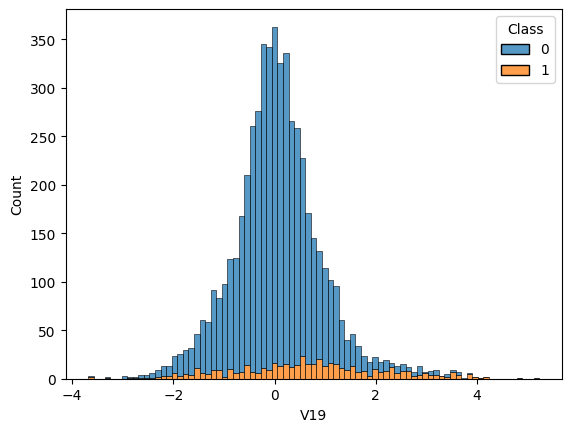

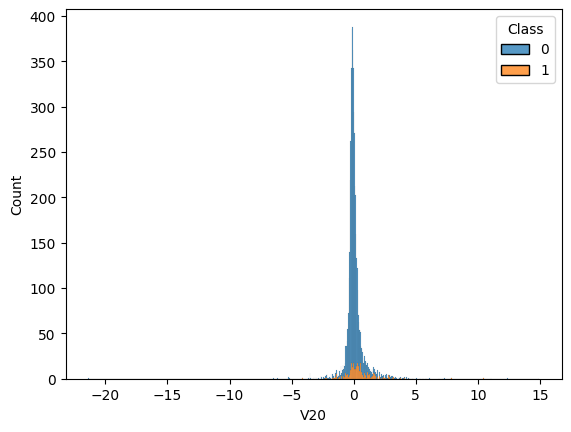

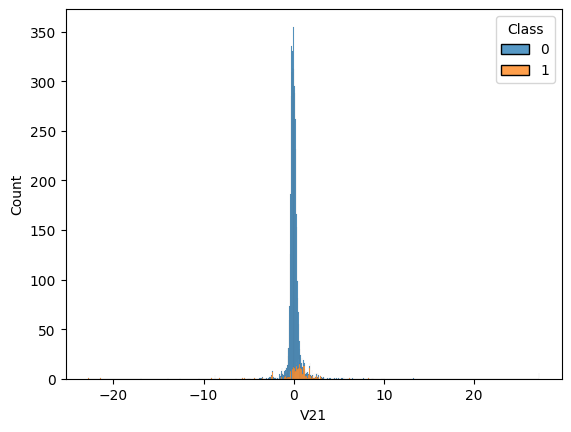

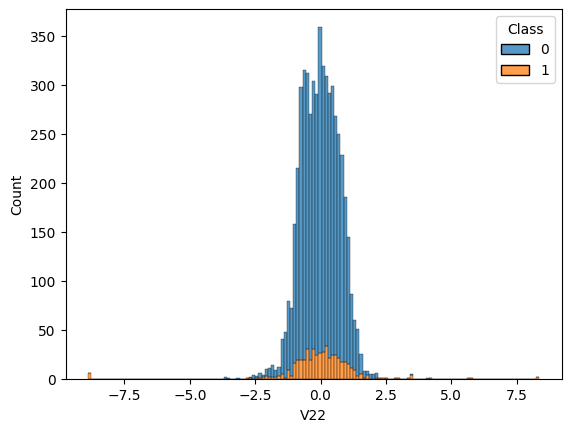

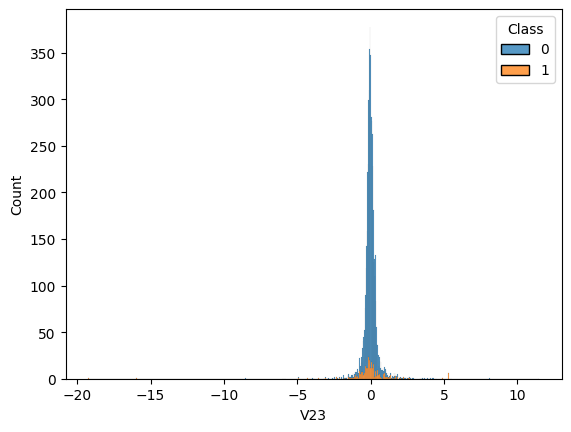

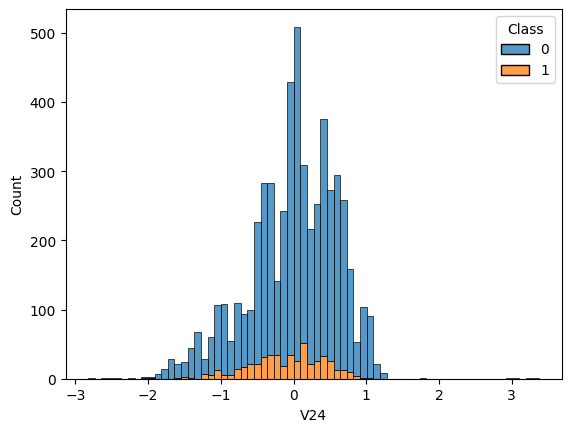

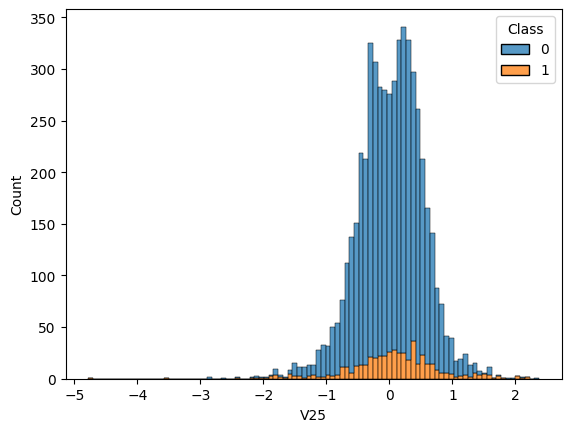

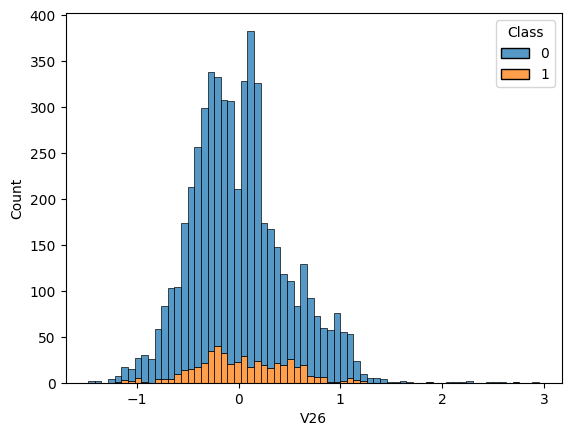

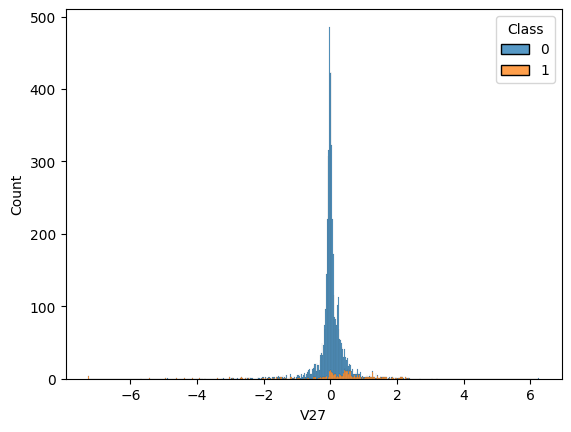

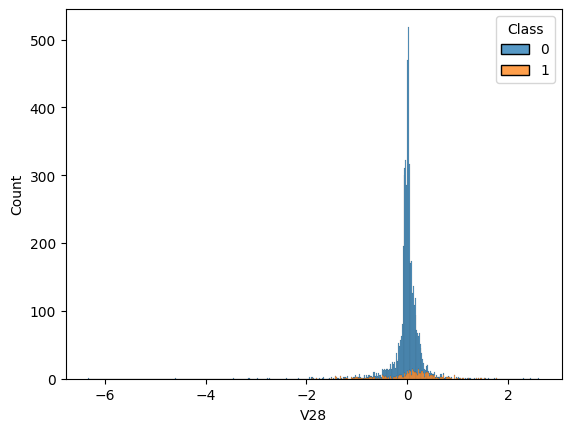

In [9]:
for i in range(1, 29):
    sns.histplot(data=new_df, x=f"V{i}", hue="Class", multiple="stack")
    plt.show()

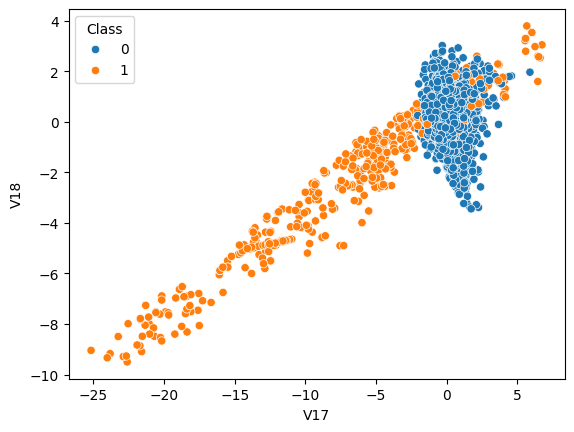

In [10]:
sns.scatterplot(x='V17', y='V18', hue='Class', data=new_df)
plt.show()

https://hackernoon.com/3-types-of-anomalies-in-anomaly-detection

Ось декілька підходів, які використовуються для виявлення аномалій:

- **Статистичні методи**:
  - *Принцип*: Припускають, що дані розподілені за певним статистичним законом (наприклад, нормальним).
  - *Приклад*: Алгоритм аналізує історію транзакцій користувача і визначає середню суму та час його покупок. Транзакція, що суттєво перевищує середню суму та здійснена в нетиповий час, буде позначена як аномалія.
- **Методи, що базуються на відстані**:
  - *Принцип*: Визначають аномалії як точки даних, що знаходяться на значній відстані від інших точок.
  - *Приклад*: Алгоритм аналізує дані про температуру тіла пацієнтів. Точка даних, що відповідає температурі 40°C, буде знаходитись набагато далі від інших точок (нормальної температури), і буде позначена як аномалія.
- **Методи кластеризації**:
  - *Принцип*: Групують схожі дані в кластери. Аномалії - це точки, що не належать до жодного кластера або належать до дуже маленьких кластерів.
  - *Приклад*: Алгоритм аналізує дані про покупки користувачів онлайн-магазину. Користувач, який купує товари з абсолютно різних категорій в нетипових для інших користувачів комбінаціях, може бути позначений як аномалія.

**Важливо пам'ятати:**

- Не існує універсального алгоритму, що ідеально виявляє всі типи аномалій.
- Вибір алгоритму залежить від конкретної задачі, типу даних та доступних ресурсів.
- Важливо правильно налаштувати алгоритм та інтерпретувати отримані результати.

## Статистичні методи

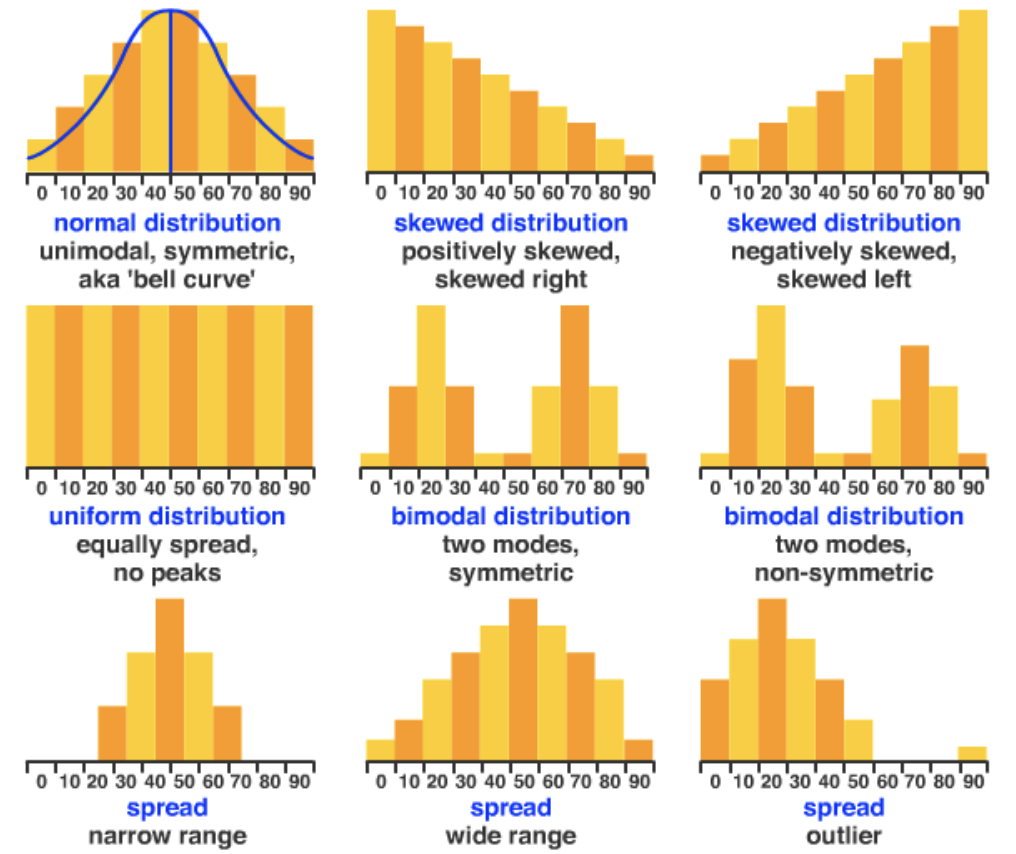

### Normal distribution

**Нормальний розподіл**, також відомий як розподіл Гауса - це симетричний дзвоноподібний розподіл, що описується двома параметрами: середнім значенням (μ) та стандартним відхиленням (σ).

- середнє значення (μ) - центр розподілу,
- стандартне відхилення (σ) - міра розкиду даних навколо середнього.

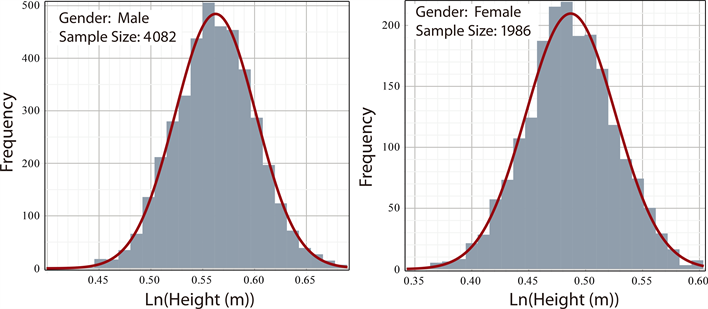

ЦГТ дозволяє використовувати нормальний розподіл для наближеного опису розподілу середніх значень вибірок, що є основою для багатьох статистичних тестів та інтервальних оцінок.

### Central limit theorem

Уявімо, що ви вимірюється зріст випадкової вибірки з 30 студентів в університеті. Потім розраховується середній зріст цієї вибірки.

Тепер повторимо цей процес багато разів, щоразу беручи нову випадкову вибірку з 30 студентів. Щоразу отримуватиметься трохи інше середнє значення зросту.

**Центральна гранична теорема (ЦГТ)** стверджує, що розподіл цих середніх значень вибірок, незалежно від того, як розподілені самі вихідні дані (зріст студентів), буде наближатися до нормального розподілу, якщо розмір вибірки досить великий.

**Важливо**: ЦГТ працює навіть тоді, коли самі дані не розподілені нормально!

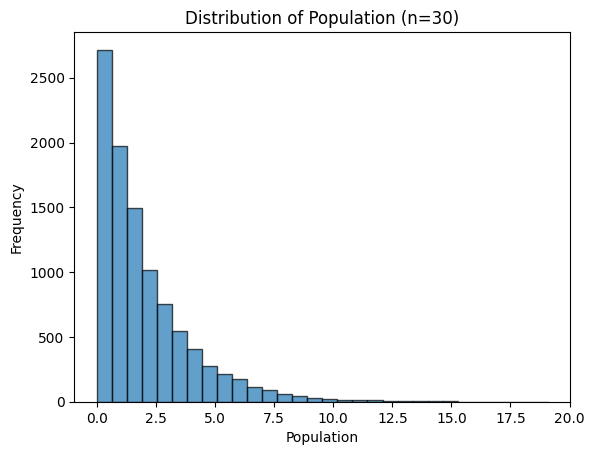

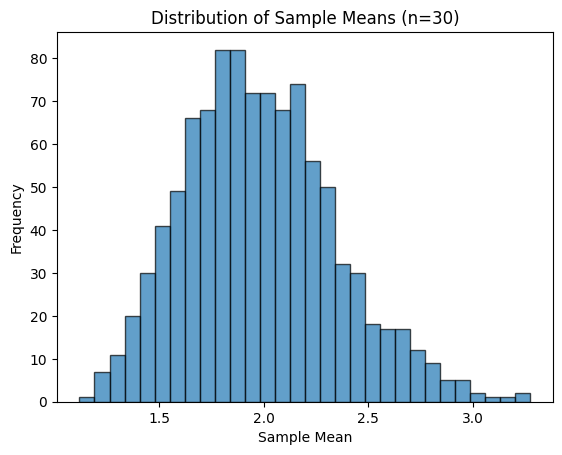

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# Generate a population with an exponential distribution
population = np.random. exponential(scale=2.0, size=10000)

plt.hist(population, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Population (n=30)')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

# Draw 1000 samples of size 30 each and calculate their means
sample_means = [np.mean(np.random.choice(population, size=30)) for _ in range(1000)]
# Plot the histogram of the sample means
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sample Means (n=30)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

### Правило трьох сігм

Важлива властивість нормального розподілу: ми знаємо, яка частина даних знаходиться в межах певної кількості стандартних відхилень від середнього:

- **~68%** даних знаходяться в межах одного стандартного відхилення від середнього (μ ± σ).
- **~95%** даних знаходяться в межах двох стандартних відхилень від середнього (μ ± 2σ).
- **~99.7%** даних знаходяться в межах трьох стандартних відхилень від середнього (μ ± 3σ).

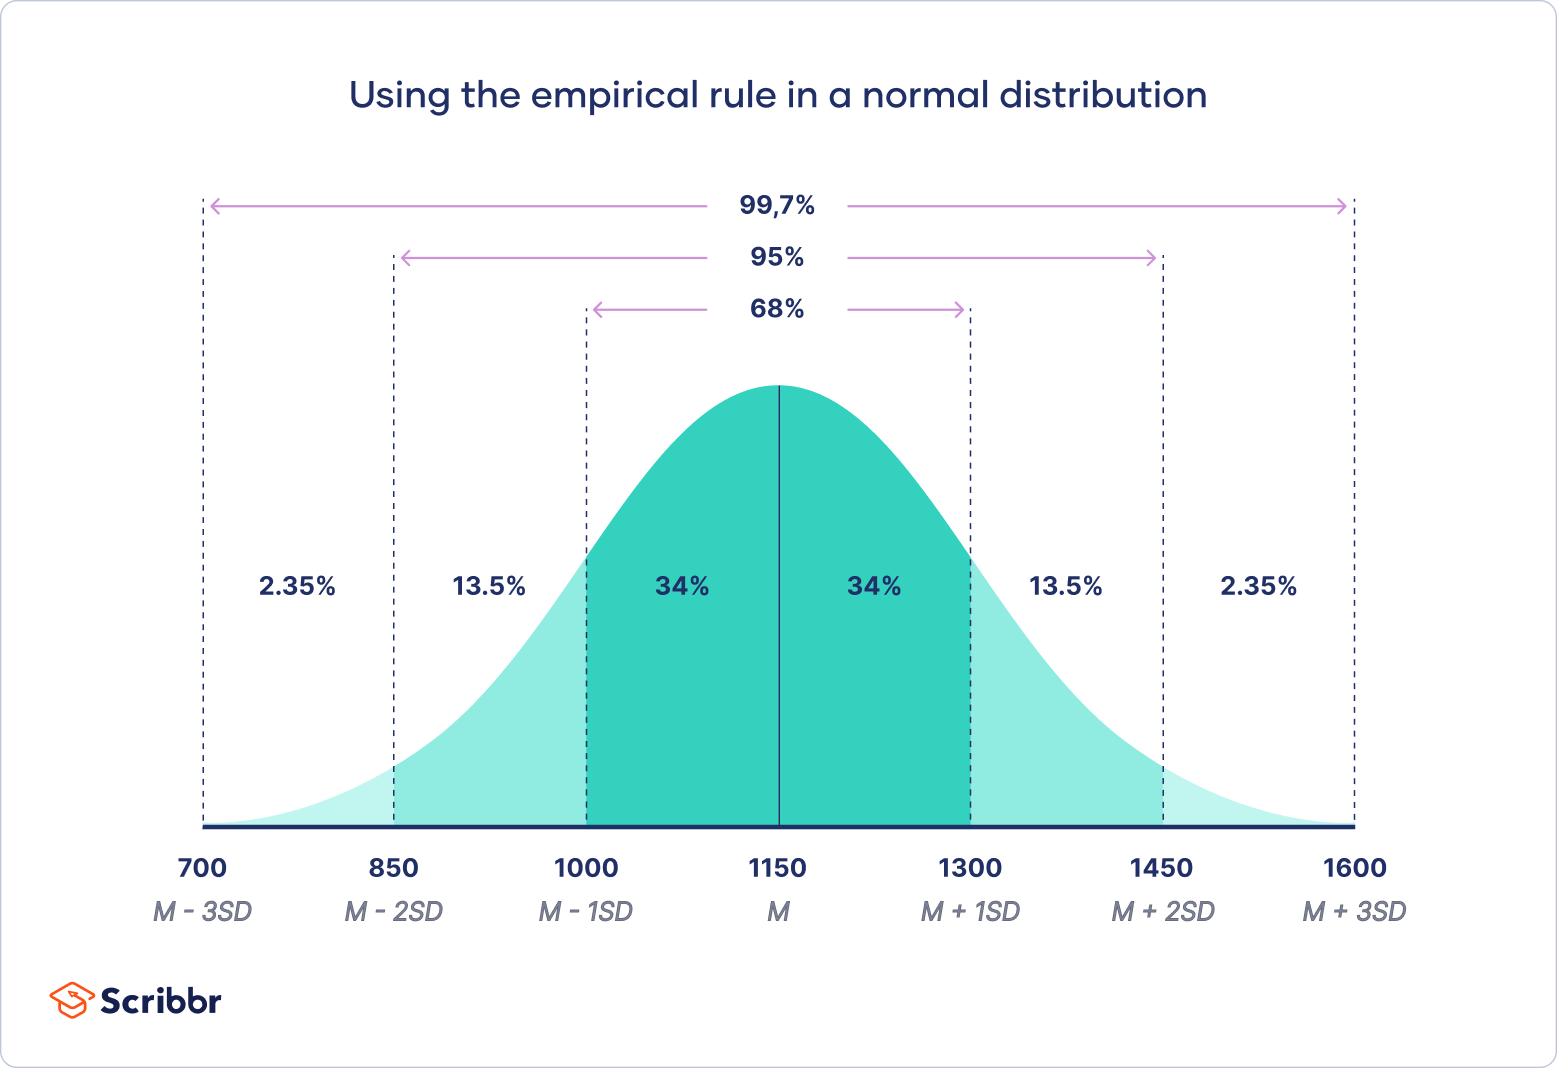

### Z-оцінка

Завдяки ЦГТ та знанню про нормальний розподіл ми можемо використовувати статистичні тести для визначення, наскільки ймовірно отримати певне значення в нашому розподілі.

**Z-оцінка** (стандартна оцінка) - це міра того, на скільки стандартних відхилень значення відхиляється від середнього значення розподілу.

Формула для розрахунку Z-оцінки:
**Z = (x - μ) / σ** , де

- x - значення, що нас цікавить,
- μ - середнє значення розподілу,
- σ - стандартне відхилення розподілу.

In [12]:
z_score_v18 = (new_df['V18'] - new_df['V18'].mean()) / new_df['V18'].std()

print(z_score_v18)

8842     -2.965388
215508   -0.081278
106916    0.295711
135390   -0.014959
43754     0.195397
            ...   
188289    0.884020
271601    0.248255
230303    0.762512
180550   -0.038958
103626    0.962555
Name: V18, Length: 5412, dtype: float64


**Зв'язок з виявленням аномалій:**

- Значення з високою Z-оцінкою (наприклад, більше 2 або 3) знаходяться далеко від середнього і можуть розглядатися як **потенційні аномалії**.

In [13]:
std_limit = 3

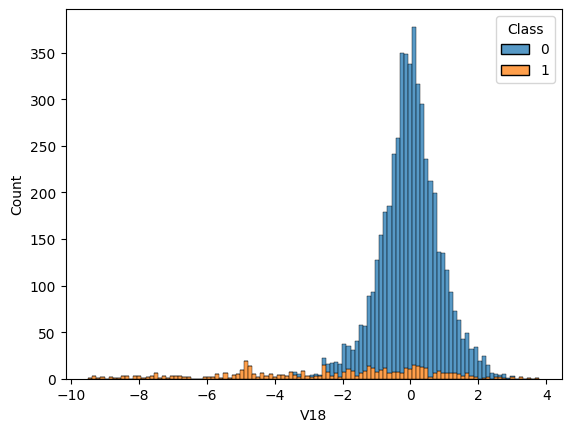

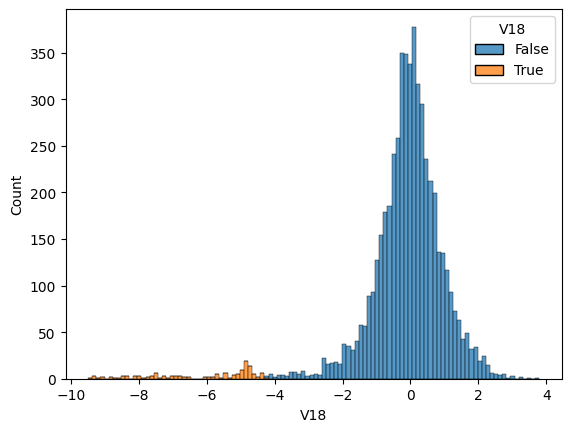

In [14]:
sns.histplot(data=new_df, x=f"V18", hue="Class", multiple="stack")
plt.show()
sns.histplot(data=new_df, x=f"V18", hue=np.abs(z_score_v18)>=std_limit, multiple="stack")
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy", accuracy_score(new_df["Class"], np.abs(z_score_v18)>=std_limit))
print("Precision", precision_score(new_df["Class"], np.abs(z_score_v18)>=std_limit))
print("Recall", recall_score(new_df["Class"], np.abs(z_score_v18)>=std_limit))

Accuracy 0.9344050258684405
Precision 1.0
Recall 0.2784552845528455


#### Fraud distribution

In [16]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

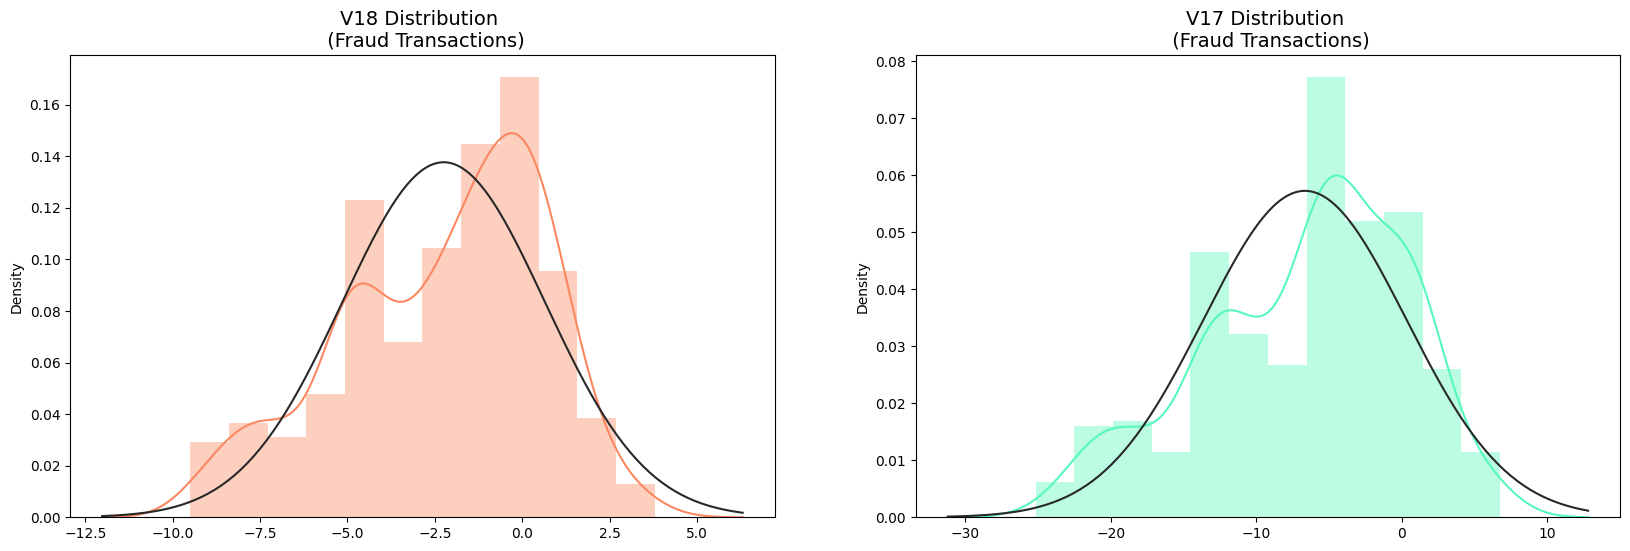

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

v14_fraud_dist = new_df['V18'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V18 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V17'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V17 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

## Методи на основі відстані

### Mahalanobis distance

**Відстань Махаланобіса** - це міра відстані, що враховує кореляцію між різними змінними в наборі даних. На відміну від евклідової відстані, яка розглядає всі змінні як незалежні, відстань Махаланобіса враховує форму і орієнтацію хмари точок даних, що робить її особливо корисною для виявлення аномалій у багатовимірних просторах.

https://medium.com/@the_daft_introvert/mahalanobis-distance-5c11a757b099

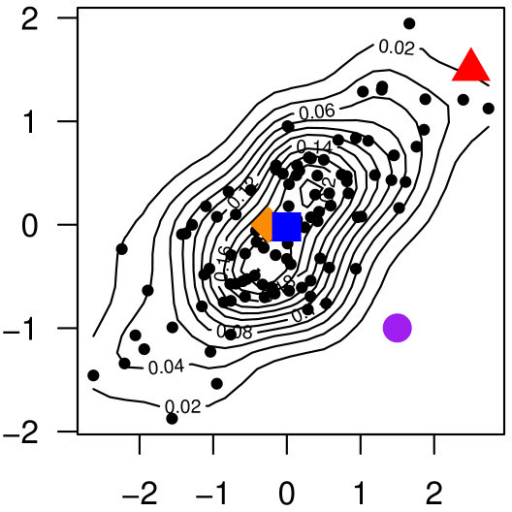

Приклад:
- Транзакція по кредитних картах, де кожна транзакція описується двома змінними: сумою транзакції та часом доби. Якщо побудувати ці дані на графіку, ми побачимо хмару точок.


Перевага відстані Махаланобіса:
- Евклідова відстань буде вимірювати відстань між точками "по прямій", не зважаючи на форму хмари.
- Відстань Махаланобіса, навпаки, враховуватиме кореляцію між сумою транзакції та часом доби. Наприклад, велика транзакція вночі може бути більш підозрілою, ніж велика транзакція вдень, оскільки вночі обсяг транзакцій зазвичай нижчий.

In [18]:
v17_18_data = new_df[["V17", "V18"]].to_numpy()

In [19]:
from scipy.spatial.distance import mahalanobis

# calculate the mean and covariance matrix of the dataset
mean = np.mean(v17_18_data, axis=0)
cov = np.cov(v17_18_data.T)

# calculate the Mahalanobis distance for each data point
mahalanobis_dist = np.array([mahalanobis(x, mean, np.linalg.inv(cov)) for x in v17_18_data])

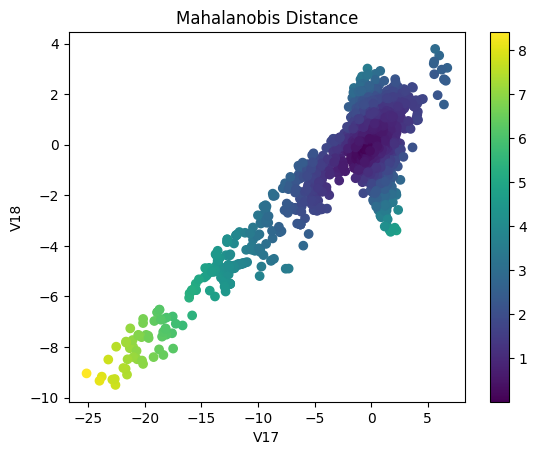

In [20]:
plt.scatter(v17_18_data[:, 0], v17_18_data[:, 1], c=mahalanobis_dist)

# add a color bar
plt.colorbar()
plt.xlabel('V17')
plt.ylabel('V18')
plt.title('Mahalanobis Distance')
plt.show()

In [21]:
mahalanobis_limit = 4

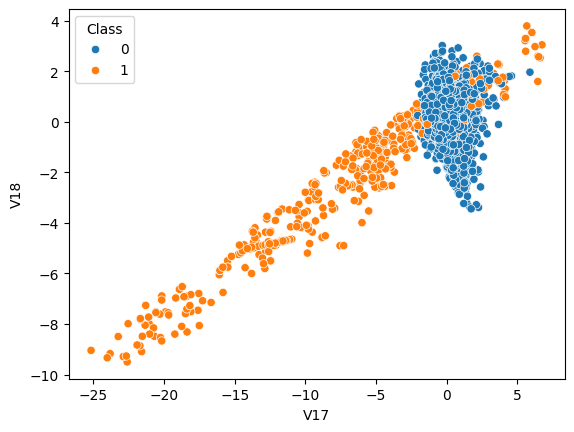

<Axes: xlabel='V17', ylabel='V18'>

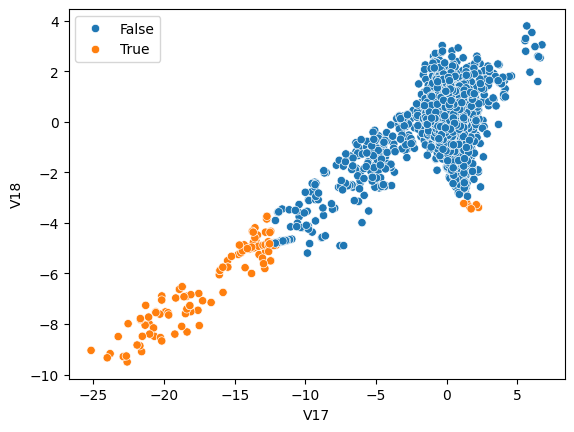

In [22]:
sns.scatterplot(x='V17', y='V18', hue='Class', data=new_df)
plt.show()
sns.scatterplot(x='V17', y='V18', hue=mahalanobis_dist>mahalanobis_limit, data=new_df)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy", accuracy_score(new_df["Class"], mahalanobis_dist>mahalanobis_limit))
print("Precision", precision_score(new_df["Class"], mahalanobis_dist>mahalanobis_limit))
print("Recall", recall_score(new_df["Class"], mahalanobis_dist>mahalanobis_limit))

Accuracy 0.929970436067997
Precision 0.952
Recall 0.241869918699187


**Переваги** відстані Махаланобіса:
- Враховує кореляцію між змінними.
- Інваріантна до масштабу змінних.
- Дозволяє виявляти аномалії у багатовимірних просторах.


**Недоліки**:
- Обчислювально дорожча, ніж евклідова відстань.
- Потребує розрахунку матриці коваріації, що може бути проблематичним для великих наборів даних.
- Підходить не для всіх задач та розподілів для задачі виявлення аномалій.

## Інші методи

### Isolation Forest

**Isolation Forest (IF)** — це алгоритм машинного навчання, що використовується для виявлення аномалій, базуючись на ідеї, що аномальні точки даних легше "ізолювати" від решти даних. На відміну від методів, які моделюють "нормальну" поведінку, IF фокусується на пошуку точок, що виділяються своєю незвичайністю.

Алгоритм Isolation Forest працює наступним чином:

1. *Випадковий вибір*: Алгоритм випадково вибирає ознаку (змінну) та випадкове значення цієї ознаки в межах її діапазону.
2. *Розділення*: Дані розділяються на дві групи: точки даних, значення яких менші за вибране, та точки даних, значення яких більші або рівні.
3. *Рекурсія*: Кроки 1 та 2 повторюються рекурсивно для кожної з отриманих груп, поки кожна точка даних не буде ізольована в окремому "листку" дерева.

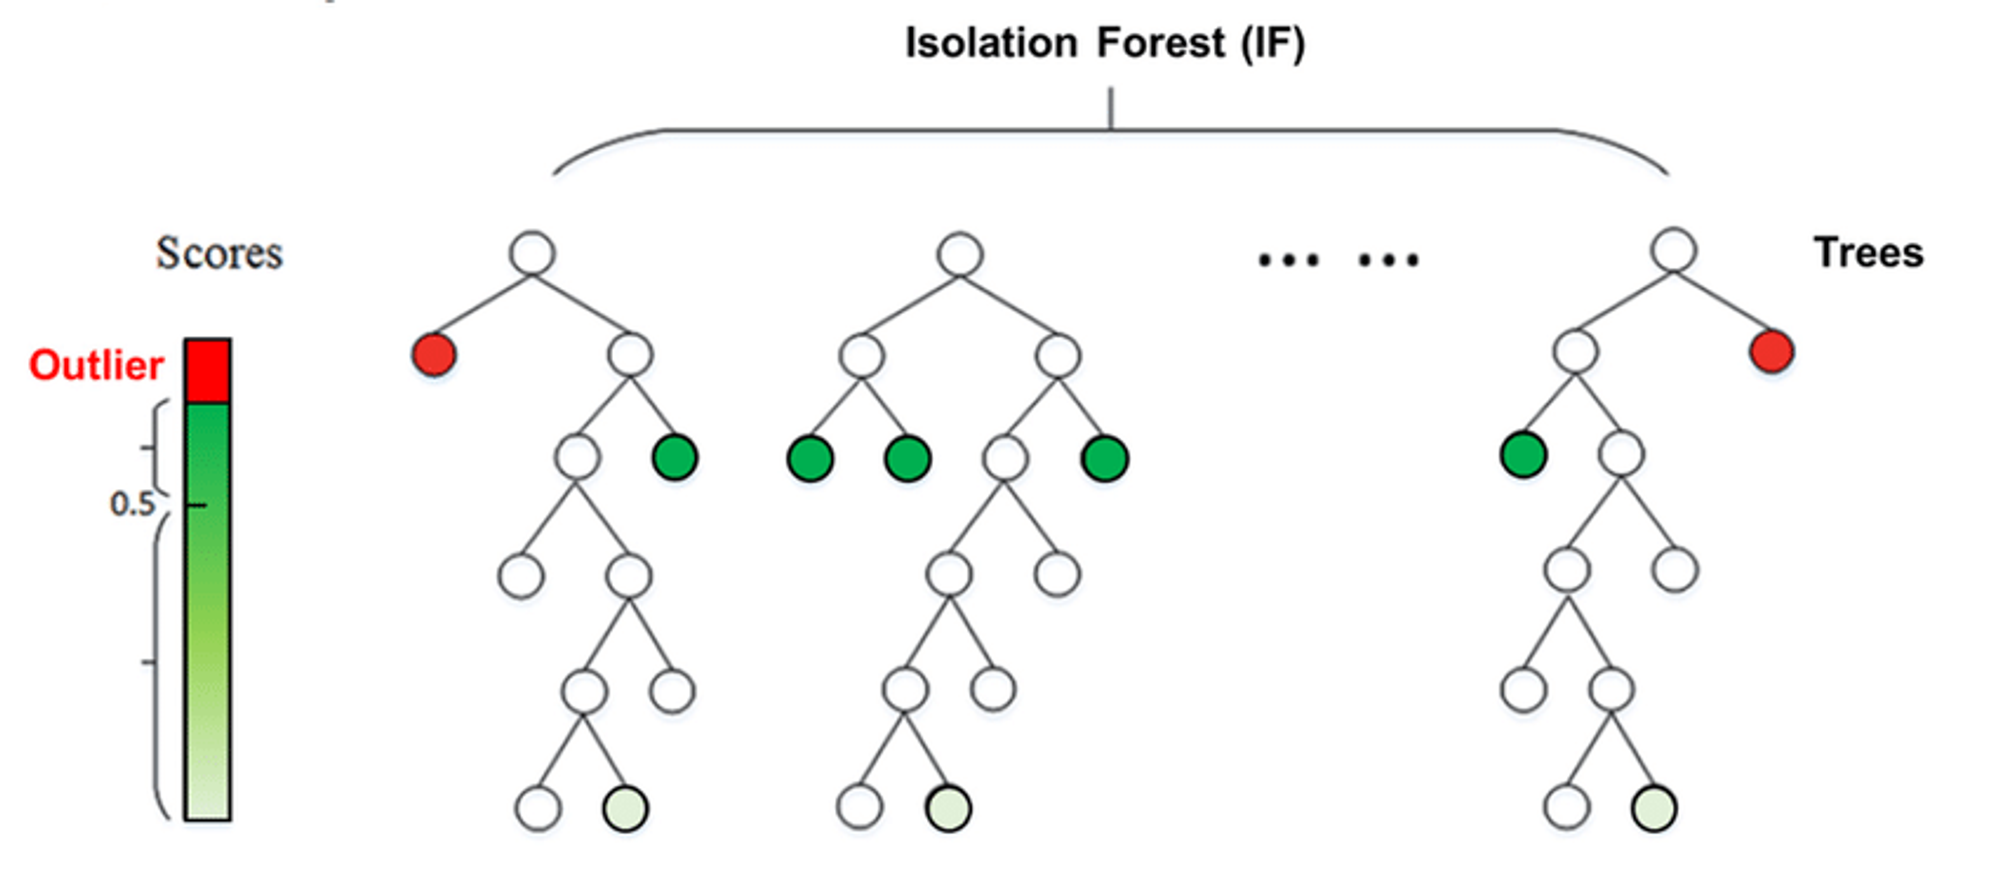

Аномальні точки даних, як правило, легше ізолювати, оскільки вони:

Нечисленні: Аномалій зазвичай менше, ніж "нормальних" точок даних.
Відрізняються: Аномалії мають значення ознак, що сильно відрізняються від значень "нормальних" точок.
Тому аномальні точки даних, як правило, швидше ізолюються (потрапляють в листки дерева на меншій глибині) порівняно з "нормальними" точками.

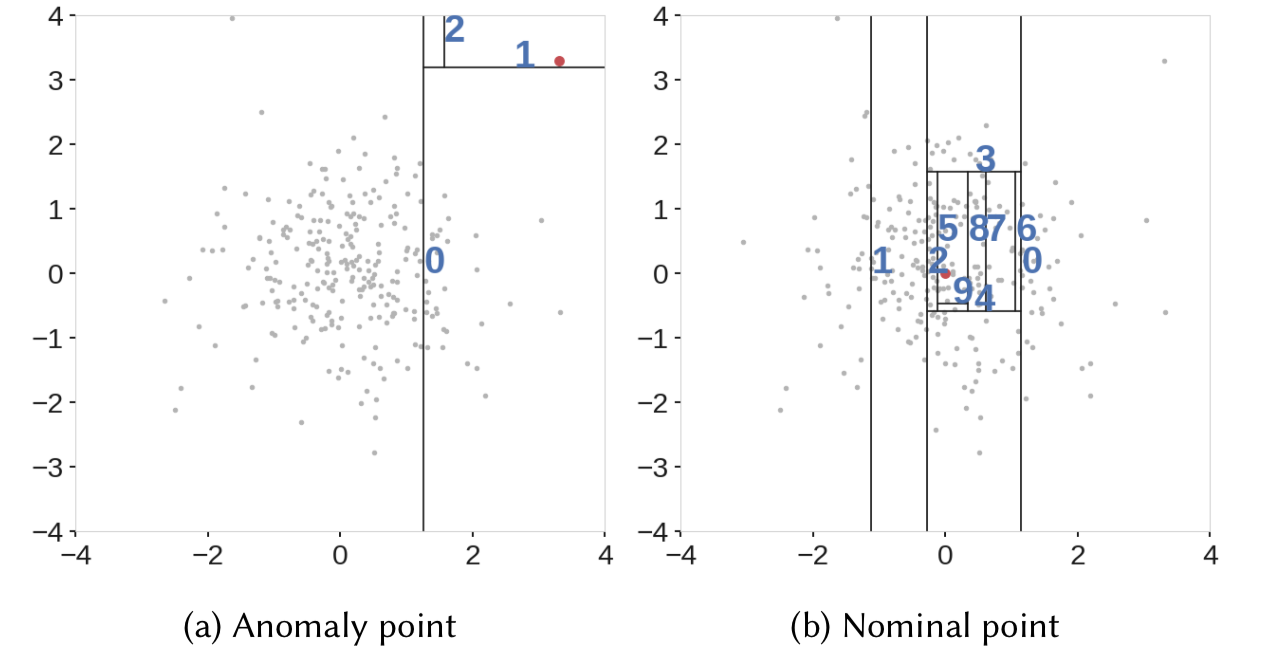

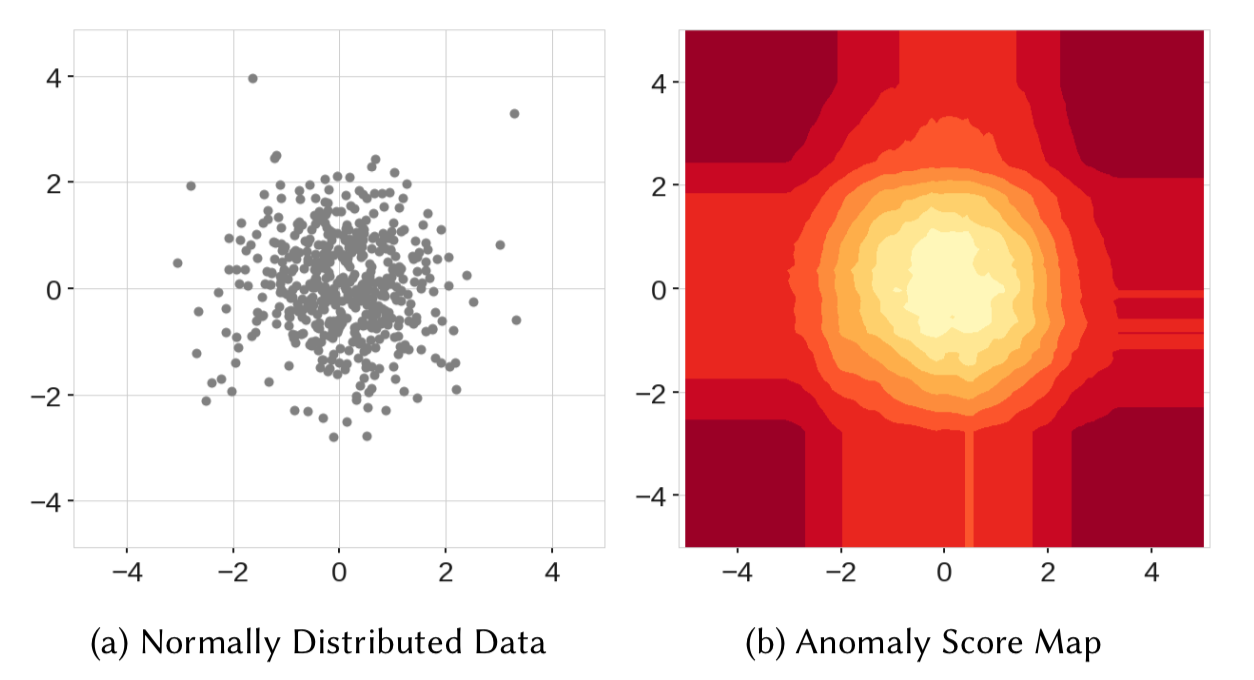

In [24]:
from sklearn.ensemble import IsolationForest

if_anomaly_detect = IsolationForest(random_state=0)
if_anomaly_detect.fit(new_df.drop(['Class'], axis=1))

IsolationForest(random_state=0)

In [25]:
if_pred = if_anomaly_detect.predict(new_df.drop(['Class'], axis=1))
if_pred

array([-1,  1,  1, ...,  1,  1,  1])

In [26]:
if_pred = np.array(if_pred == -1, dtype=int)
if_pred

array([1, 0, 0, ..., 0, 0, 0])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy", accuracy_score(new_df["Class"], if_pred))
print("Precision", precision_score(new_df["Class"], if_pred))
print("Recall", recall_score(new_df["Class"], if_pred))

Accuracy 0.9482631189948263
Precision 0.7819148936170213
Recall 0.5975609756097561


**Переваги Isolation Forest:**

- Ефективність: Алгоритм добре масштабується для великих наборів даних.
- Не потребує припущень про розподіл: IF не вимагає, щоб дані відповідали певному розподілу.
- Стійкість до викидів: Алгоритм не чутливий до викидів, оскільки він фокусується на ізоляції окремих точок.

**Недоліки**:

- Інтерпретація: Результати IF може бути важко інтерпретувати, оскільки алгоритм не надає чітких пояснень, чому певні точки вважаються аномальними.
- Вибір гіперпараметрів: Ефективність IF може залежати від вибору гіперпараметрів, таких як кількість дерев і глибина дерев.

### Local Outlier Factor (LOF)

**Local Outlier Factor (LOF)** - це алгоритм машинного навчання, який визначає аномалії, аналізуючи локальную щільність даних. Замість того, щоб шукати точки, що глобально віддалені від інших, LOF фокусується на відносній ізольованості точки порівняно з її сусідами.

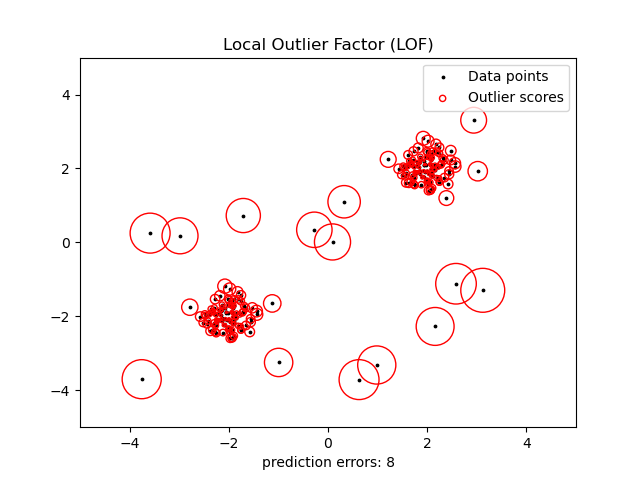

1. Визначення сусідів: Для кожної точки даних алгоритм знаходить її k найближчих сусідів (значення k - це гіперпараметр алгоритму).
2. Розрахунок локальної щільності: LOF оцінює локальную щільність кожної точки даних, аналізуючи відстань до її сусідів. Точки даних у щільних областях матимуть вищу локальную щільність, а точки в розріджених областях - нижчу.
3. Обчислення LOF: Для кожної точки даних LOF розраховує співвідношення її локальної щільності до середньої локальної щільності її сусідів.
Високе значення LOF (значно більше 1) означає, що точка даних знаходиться в менш щільній області, ніж її сусіди, і може вважатися аномалією.
Низьке значення LOF (близьке до 1 або менше) означає, що точка даних має подібну локальную щільність до своїх сусідів.

In [28]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

lof_anomaly_detect = LocalOutlierFactor(novelty=True, n_neighbors=2)
lof_anomaly_detect.fit(new_df.drop(['Class'], axis=1))

LocalOutlierFactor(n_neighbors=2, novelty=True)

In [29]:
lof_pred = lof_anomaly_detect.predict(new_df.drop(['Class'], axis=1))
lof_pred = np.array(lof_pred == -1, dtype=int)

print("Accuracy", accuracy_score(new_df["Class"], lof_pred))
print("Precision", precision_score(new_df["Class"], lof_pred))
print("Recall", recall_score(new_df["Class"], lof_pred))

Accuracy 0.8514412416851441
Precision 0.10406091370558376
Recall 0.08333333333333333


**Переваги LOF:**

- Чутливість до локальних аномалій: LOF ефективно виявляє аномалії, які непомітні при глобальному аналізі даних.
- Немає припущень про форму кластерів: LOF може виявляти аномалії в даних з довільною формою кластерів.

**Недоліки:**

- Чутливість до вибору k: Ефективність LOF може сильно залежати від правильного вибору кількості сусідів (k).
- Обчислювальна складність: LOF може бути ресурсоємним для великих наборів даних.

### Novelty Detection (OneClassSVM)

**Novelty Detection** (Виявлення новизни), часто реалізований за допомогою OneClassSVM, - це підхід машинного навчання, який фокусується на визначенні меж "нормальності" у даних. Замість того, щоб безпосередньо шукати аномалії, OneClassSVM вчиться описувати область, де знаходяться "нормальні" дані, і маркує все, що виходить за її межі, як "новизну" (тобто потенційну аномалію).

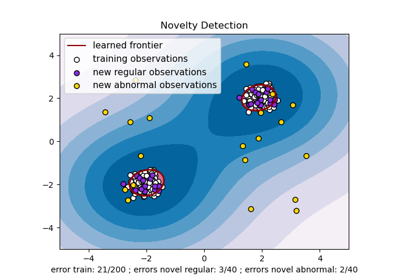

In [30]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(new_df.drop(['Class'], axis=1))

In [31]:
from sklearn.svm import OneClassSVM

oc_svm = OneClassSVM(gamma='auto').fit(X_scaled)

In [32]:
oc_svm_pred = oc_svm.predict(X_scaled)
oc_svm_pred = np.array(oc_svm_pred == -1, dtype=int)

print("Accuracy", accuracy_score(new_df["Class"], oc_svm_pred))
print("Precision", precision_score(new_df["Class"], oc_svm_pred))
print("Recall", recall_score(new_df["Class"], oc_svm_pred))

Accuracy 0.5833333333333334
Precision 0.17436276320650165
Recall 0.959349593495935


**Переваги OneClassSVM:**

- Ефективність в умовах обмежених даних: Алгоритм добре працює, навіть якщо у вас немає великої кількості мічених аномалій для навчання.
- Гнучкість: Завдяки різним ядрам OneClassSVM може моделювати складні межі між "нормальними" та аномальними даними.

**Недоліки:**

- Чутливість до вибору ядра та гіперпараметрів: Ефективність OneClassSVM може сильно залежати від правильного вибору ядра та гіперпараметрів.
- Складність інтерпретації: Іноді може бути складно інтерпретувати, чому алгоритм класифікує певну точку даних як "новизну".